In [27]:
#load the necessary modules
import pandas as pd
import numpy as np
import datetime, math
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import os
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm, preprocessing
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

from keras.models import Model
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential

In [2]:
#load path here where the datasets reside
path = './ten-datasets/'

#load the dataset into a dataframe
df_forestdata = pd.read_csv(path + 'Forest.csv')

In [3]:
#labels are in the last column, features are in the other columns
Y = df_forestdata.iloc[:,54]
X = df_forestdata.iloc[:,0:54]

In [4]:
X = preprocessing.scale(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size =0.2, random_state = 0)

In [8]:
%%time

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

Wall time: 5min 11s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
accuracy = clf.score(X_test, y_test)
print('model test accuracy: %.4f' %(accuracy))


model test accuracy: 0.7154


In [10]:
%%time

clf = RandomForestClassifier(criterion='gini', n_estimators=100)
clf.fit(X_train, y_train)

Wall time: 3min


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
accuracy = clf.score(X_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 1.0000


In [12]:
accuracy = clf.score(X_test, y_test)
print('model test accuracy: %.4f' %(accuracy))

model test accuracy: 0.9557


# Deep learning

In [13]:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [16]:
# 2 hidden layers, 100 units
inputs = Input(shape=X_train.shape[1:])
hidden = Dense(512, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(512, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(8,activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 464809 samples, validate on 116203 samples
Epoch 1/10
464809/464809 [==============================] - 37s 79us/step - loss: 0.4878 - accuracy: 0.7926 - val_loss: 0.3981 - val_accuracy: 0.8336
Epoch 2/10
464809/464809 [==============================] - 38s 82us/step - loss: 0.3446 - accuracy: 0.8572 - val_loss: 0.3065 - val_accuracy: 0.8739
Epoch 3/10
464809/464809 [==============================] - 39s 84us/step - loss: 0.2913 - accuracy: 0.8804 - val_loss: 0.2733 - val_accuracy: 0.8878
Epoch 4/10
464809/464809 [==============================] - 37s 80us/step - loss: 0.2602 - accuracy: 0.8934 - val_loss: 0.2539 - val_accuracy: 0.8967
Epoch 5/10
464809/464809 [==============================] - 41s 87us/step - loss: 0.2397 - accuracy: 0.9027 - val_loss: 0.2321 - val_accuracy: 0.9064
Epoch 6/10
464809/464809 [==============================] - 39s 85us/step - loss: 0.2239 - accuracy: 0.9091 - val_loss: 0.2156 - val_accuracy: 0.9120
Epoch 7/10
464809/464809 [======================

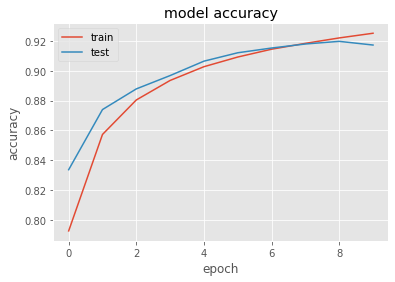

In [18]:
plot_history(history)

In [19]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 464809 samples, validate on 116203 samples
Epoch 1/10
464809/464809 [==============================] - 28s 61us/step - loss: 0.1428 - accuracy: 0.9439 - val_loss: 0.1507 - val_accuracy: 0.9411
Epoch 2/10
464809/464809 [==============================] - 27s 59us/step - loss: 0.1315 - accuracy: 0.9489 - val_loss: 0.1459 - val_accuracy: 0.9429
Epoch 3/10
464809/464809 [==============================] - 26s 56us/step - loss: 0.1277 - accuracy: 0.9506 - val_loss: 0.1439 - val_accuracy: 0.9435
Epoch 4/10
464809/464809 [==============================] - 25s 54us/step - loss: 0.1251 - accuracy: 0.9514 - val_loss: 0.1418 - val_accuracy: 0.9444
Epoch 5/10
464809/464809 [==============================] - 24s 51us/step - loss: 0.1231 - accuracy: 0.9523 - val_loss: 0.1410 - val_accuracy: 0.9447
Epoch 6/10
464809/464809 [==============================] - 27s 58us/step - loss: 0.1215 - accuracy: 0.9529 - val_loss: 0.1406 - val_accuracy: 0.9455
Epoch 7/10
464809/464809 [======================

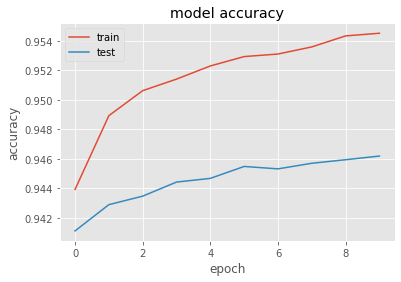

In [20]:
plot_history(history)

# CNN

In [24]:
X_train = X_train[:, :, np.newaxis]
X_train.shape

(464809, 54, 1)

In [25]:
X_test = X_test[:, :, np.newaxis]
X_test.shape

(116203, 54, 1)

In [28]:

model = Sequential()

model.add(Conv1D(32, 6, activation='relu', input_shape=X_train.shape[1:], strides=1))
model.add(Conv1D(32, 6))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
         
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 49, 32)            224       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 44, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 448)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               229888    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [30]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 464809 samples, validate on 116203 samples
Epoch 1/10
464809/464809 [==============================] - 61s 132us/step - loss: 0.6395 - accuracy: 0.7243 - val_loss: 0.5213 - val_accuracy: 0.7770
Epoch 2/10
464809/464809 [==============================] - 62s 134us/step - loss: 0.5445 - accuracy: 0.7662 - val_loss: 0.4760 - val_accuracy: 0.7983
Epoch 3/10
464809/464809 [==============================] - 65s 141us/step - loss: 0.5129 - accuracy: 0.7801 - val_loss: 0.4384 - val_accuracy: 0.8144
Epoch 4/10
464809/464809 [==============================] - 67s 143us/step - loss: 0.4945 - accuracy: 0.7883 - val_loss: 0.4210 - val_accuracy: 0.8214
Epoch 5/10
464809/464809 [==============================] - 66s 142us/step - loss: 0.4817 - accuracy: 0.7941 - val_loss: 0.4070 - val_accuracy: 0.8307
Epoch 6/10
464809/464809 [==============================] - 59s 128us/step - loss: 0.4713 - accuracy: 0.7997 - val_loss: 0.3958 - val_accuracy: 0.8322
Epoch 7/10
464809/464809 [================

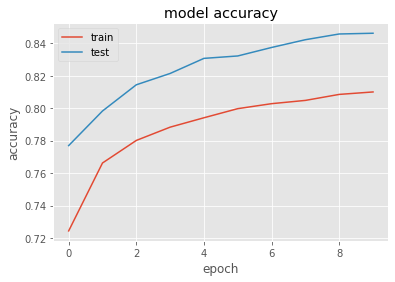

In [31]:
plot_history(history)